# Lecture 2: Data Structures in R

### STAT598z: Intro. to computing for statistics


***


## Vinayak Rao

### Department of Statistics, Purdue University
---

## The R programming language

From the manual,
+ R is a system for statistical computation and graphics
+ R provides a programming language, high level graphics,interfaces to other languages and debugging facilities

It is possible to go far using R interactively

However, we will also study the language with the goals of 
+ writing good software
+ allowing easy reproducibility of our analyses


#### ‘Everything in R is an object’

An object consists of a <font color="tomato"> symbol </font> (name) and a <font color="tomato">value</font>
+ The function class() returns the object’s class
+ Useful for object-oriented programming
E.g. Polymorphism lets the same function (print, plot) do
different things to different objects

Also relevant: typeof(), mode() and storage.mode()



##  R types

typeof() gives the type or internal storage mode of an object

Common types include:
+ ** atomic vectors** “logical”, “integer”, “double”, “complex”, “character”, “raw”
+ “list”: Various useful data-structures
+ “closure”: Functions
+ “symbol”: Variable names
+ **Miscellaneous**: Various internal and advanced types

## Atomic vectors

Informally, often just called ’vectors’

Contiguous collections of objects of the same type

Common types include: “logical”, “integer”, “double”,
“complex”, “character”, “raw”

R has no scalars, just vectors of length 1

###  Creating length one vectors

In [2]:
age <- 15  # Length 1 vector 

In [3]:
name <- 'Bob' 

In [5]:
old_enough <- age >= 18  #old_enough <- FALSE 

In [6]:
print(name)

[1] "Bob"


In [7]:
old_enough

[1] FALSE

Comments:
+ age, name, and old_enough are variable names
+ ‘ <- ’ is the assign operator
+ ‘ = ’ usually works but is not recommended

In [10]:
16 -> age # Valid, but harder to read

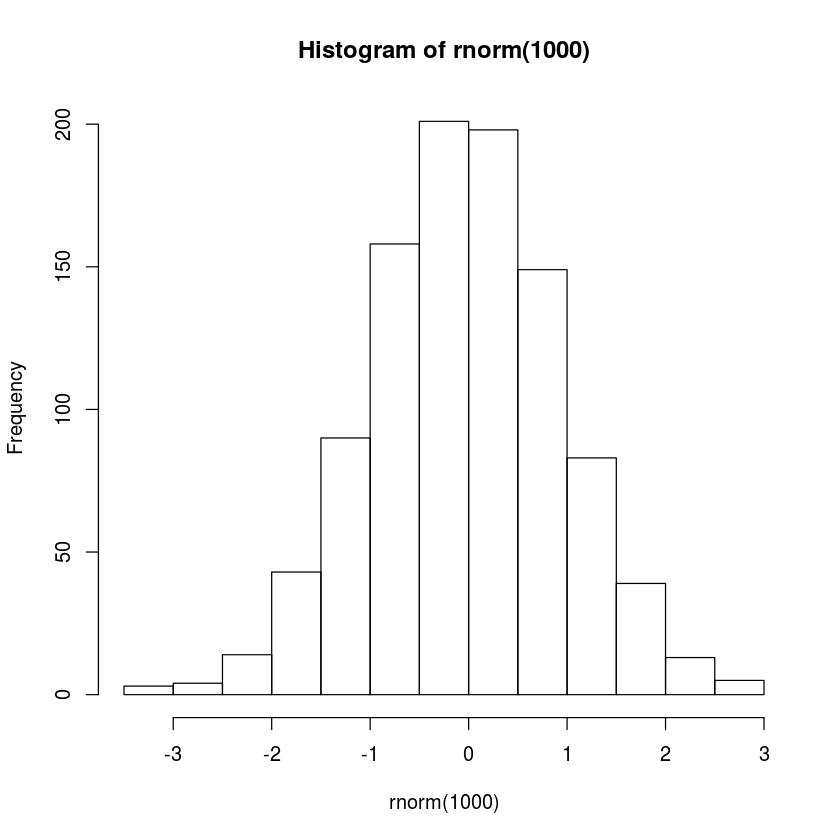

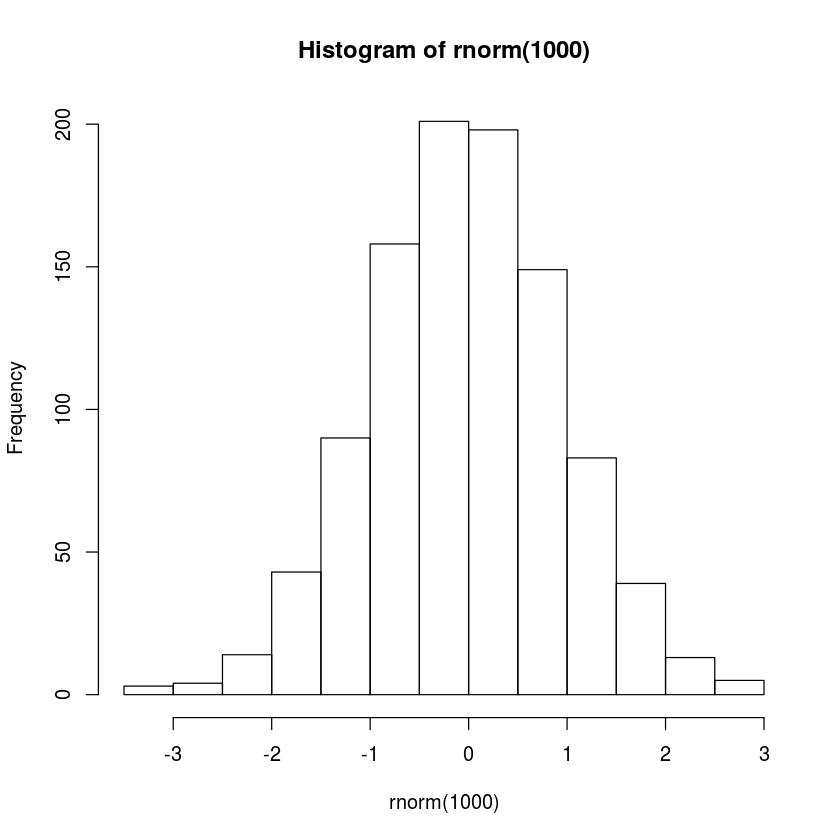

In [1]:
plot(hist(rnorm(1000)))

In [12]:
typeof(age) # Note: age is a double

[1] "double"

In [13]:
class(age)

[1] "numeric"

In [15]:
typeof(name)

[1] "character"

In [16]:
class(name) 

[1] "character"

In [17]:
age <- 19L
typeof(age)

[1] "integer"

#### General vectors:
The c() function (**concatenate**) creates vectors 

In [18]:
people <- c("Alice", "Bob", 'Carol') # single/double quotes

In [24]:
years <- 1991 : 2000  # Watch out for: years <- 2000:1991

In [28]:
even_years  <- (years %% 2) == 0

In [23]:
class(people)

[1] "character"

In [27]:
typeof(years)

[1] "integer"

In [30]:
is.vector(even_years)

[1] "logical"

### Indexing elements of a vector
Use brackets [] to index subelements of a vector

First element of a vector is indexed by 1 

In [31]:
people[1]    # First element is indexed by 1

[1] "Alice"

In [34]:
years[1 : 5] # Index with a subvector of integers

[1] 1991 1992 1993 1994 1995

In [35]:
years[c(1, 3, length(years))]

[1] 1991 1993 2000

Negative numbers exclude elements

In [36]:
people[-1] # All but the first element

[1] "Bob"   "Carol"

In [1]:
years[c(-1, - length(years))] #All but first and last elementts

ERROR: Error in eval(expr, envir, enclos): object 'years' not found


In [38]:
years[ - c(1,length(years))] # Equivalently

[1] 1992 1993 1994 1995 1996 1997 1998 1999

Index with logical vectors

In [39]:
even_years  # Same as print(even_years)

[1] FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE

In [40]:
years[even_years] # Index with a logical vector

[1] 1992 1994 1996 1998 2000

### Example

Sample 100 Gaussian random variables and find the mean of the positive elements

In [41]:
xx <- rnorm(100, 0, 1) # Sample 100 Gaussians
indx_xx_pos <- (xx > 0) # Is this element positive

In [42]:
xx_pos <- xx[indx_xx_pos] # Extract positive elements

In [44]:
xx_pos_mean <- mean(xx_pos) # calculate mean

[1] 0.8414722

More terse:

In [ ]:
xx <- rnorm(100, 0, 1) # Sample 100 Gaussians

In [45]:
xx_pos_mean <- mean(xx[xx > 0]) # calc. mean of positives

In [46]:
xx_pos_mean

[1] 0.8414722

### Replacing elements of a vector
Can assign single elements


In [47]:
people[1] <- 'Dave'; print(people)

[1] "Dave"  "Bob"   "Carol"


or multiple elements:

In [51]:
years[even_years] <- years[even_years] + 1; print(years)

 [1] 1991 1993 1993 1995 1995 1997 1997 1999 1999 2001


or assign multiple elements a single value
(more on this when we look at recycling)

In [53]:
years[-c(1,length(years))] <- 0; print(years)

 [1] 1991    0    0    0    0    0    0    0    0 2001


How about years <- 0?

### Coercion

What if we assign an element a value of the wrong type?

In [54]:
vals <- 1 : 3
typeof(vals)

[1] "integer"

In [56]:
vals[2] <- 'two'; print(vals)
typeof(vals)

[1] "1"   "two" "3"  


[1] "character"

R will **coerce** the vector to the most flexible type

In increasing flexibility: logical, integer, double, and character

The c() operator does the same

In [57]:
stuff <- c( TRUE , 3L, 3.14, 'pi')
stuff

[1] "TRUE" "3"    "3.14" "pi"

In [58]:
typeof(stuff)

[1] "character"

Use **lists** if you really wanted a heterogeneous collection

### More on the c() operator

Atomic vectors are always flat, even for nested c() operators

Example from Advanced R, Hadley Wickham:

In [59]:
c(1, c(2, c(3, 4)))

[1] 1 2 3 4

A vector of vectors is still just a vector

Use lists/matrices/arrays if you want nested structure

What if we assign to an element outside the vector?

In [60]:
years[length(years) + 1] <- 2015

In [61]:
length(years); years

[1] 11

[1] 1991    0    0    0    0    0    0    0    0 2001 2015

We have increased the vector length by 1

In general, this is an inefficient way to go about things

Much more efficient is to first allocate the entire vector

In [65]:
vals <- 1 : 3
typeof(vals)

[1] "integer"

In [66]:
vals[6] <- 6L

In [68]:
print(vals)

[1]  1  2  3 NA NA  6


Also get NAs if we access elements outside the  range of the vector

### NA (Not available)
NA is a length 1 constant to handle missing values

Different from NaN (not a number), which results from e.g. dividing 0 by 0

NA can be coerced into any of the earlier data types

A useful command is is.na()

### Vector operations and recycling
Unary transformations to a vectors: mean, sum, power etc

Binary operations are usually elementwise

What if vectors have different lengths?

**Recycle**: repeat shorter vector till the lengths match

Very convenient, but can allow bugs to remain undetected

R gives a warning if longer length is not multiple of shorter

### Recycling

In [ ]:
val <- 1 : 6
val + 1

In [ ]:
val + c(1,2)